In [37]:
import numpy as np
import pandas as pd
import nltk
import gensim 
from tqdm import tqdm_notebook as tqdm

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ernandes_azevedo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ernandes_azevedo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
data = pd.read_json('../datasets/reviews.json')
data.head(3)

,sentiment,text
0,pos,Gostei bastante de Small Data. Embora tenha ex...
1,pos,Recomendo para diversas pessoas que gostam de ...
2,pos,Adorei o livro. Linguagem clara e inteligente....


In [3]:
data['sentiment'].unique()

array(['pos', 'neg', 'neutral'], dtype=object)

In [4]:
data.text =data.text.astype(str)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73665 entries, 0 to 73664
Data columns (total 2 columns):
sentiment    73665 non-null object
text         73665 non-null object
dtypes: object(2)
memory usage: 1.7+ MB


In [7]:
stopwords = nltk.corpus.stopwords.words("portuguese")
sent_lst = []

for doc in tqdm(data['text'].values):
    sentences = nltk.tokenize.sent_tokenize(doc,language="portuguese")
                
    for sent in sentences:
        word_lst = [w for w in nltk.tokenize.word_tokenize(sent, language='portuguese') if w.isalnum() and w not in stopwords ]
        sent_lst.append(word_lst)
        

In [8]:
sent_lst[0:2]

[['Gostei', 'bastante', 'Small', 'Data'],
 ['Embora',
  'exemplos',
  'cases',
  'demais',
  'gosto',
  'todos',
  'cases',
  'trazem',
  'informações',
  'interessantes',
  'longo',
  'livro',
  'capítulo',
  'final',
  'consegue',
  'retomar',
  'fazer',
  'boa',
  'síntese',
  'tudo']]

In [10]:
embed_dim = 200
filename = '../model/fasttext_model.txt'
# fasttext_model = gensim.models.FastText(size=embed_dim,window=1)
# fasttext_model.build_vocab(sentences=sent_lst)
# fasttext_model.train(sentences=sent_lst, total_examples=len(sent_lst), epochs=10)

# fasttext_model.save(filename)

In [11]:
model = gensim.models.FastText.load(filename)

In [16]:
limit = 200
words = []

embedding = np.array([])
i = 0

for word in model.wv.vocab:
    if i == 200: break
    
    words.append(word)
    embedding = np.append(embedding, model[word])
    i +=1
    
embedding = embedding.reshape(limit, embed_dim)


C:\Users\ernandes_azevedo\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


In [18]:

tsne = TSNE(n_components=2)

In [21]:
low_dim_embedding = tsne.fit_transform(embedding)
low_dim_embedding

array([[-2.354074  ,  3.510207  ],
       [ 3.3151407 ,  6.014577  ],
       [ 1.2965809 ,  2.7819748 ],
       [ 1.8915359 ,  2.945391  ],
       [ 8.619242  ,  1.0033652 ],
       [ 0.9937314 , -4.9757543 ],
       [-1.1118755 , -5.0686817 ],
       [ 3.8500383 , -7.0212817 ],
       [-7.968864  , -0.8404096 ],
       [ 0.74352837, -6.787292  ],
       [ 6.041386  , -4.9822645 ],
       [-2.9747207 , -6.3331738 ],
       [-1.1320186 , -3.7273877 ],
       [ 6.7520456 , -2.5180583 ],
       [-1.4736918 ,  4.875184  ],
       [-1.3289145 ,  4.4652557 ],
       [ 3.4221454 ,  4.1975374 ],
       [-5.9077325 , -0.49214128],
       [ 2.522394  ,  9.419959  ],
       [ 3.1585221 , 10.434197  ],
       [ 6.3960137 ,  4.1839437 ],
       [ 1.4619493 ,  1.8304992 ],
       [ 1.8971872 ,  6.8552203 ],
       [-6.553791  ,  6.1199126 ],
       [ 2.8778744 ,  2.0588293 ],
       [-3.1473143 ,  2.8994563 ],
       [-3.2704785 , -4.404954  ],
       [-4.8746476 , -5.9341326 ],
       [-7.922022  ,

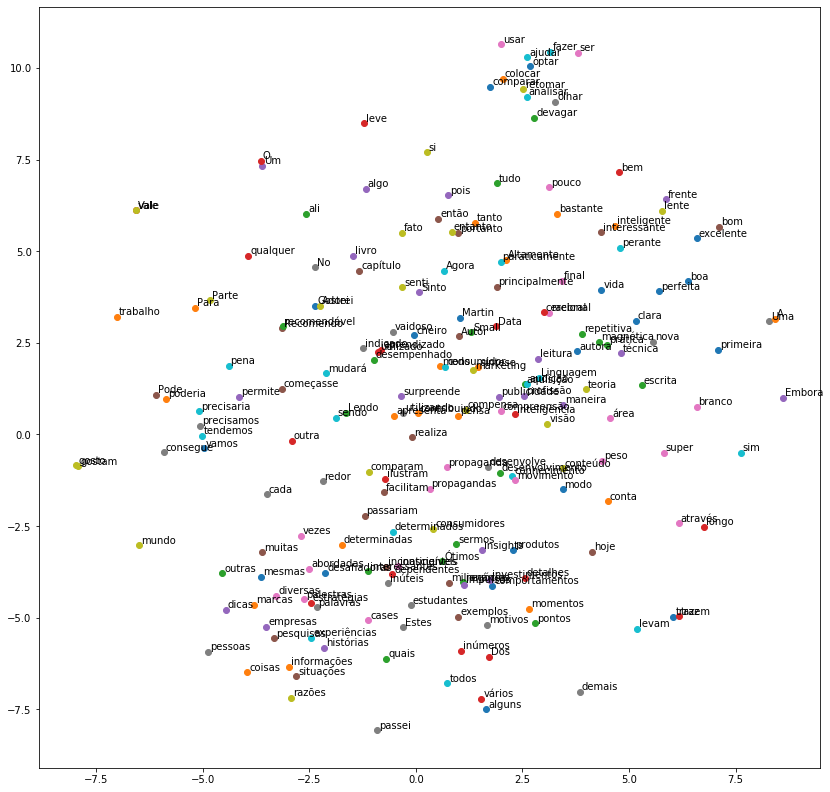

In [28]:

figure_filename = 'tsne.png'
plt.figure(figsize=(14,14))

for i, label in enumerate(words):
    x, y = low_dim_embedding[i, :]
    plt.scatter(x,y)
    plt.annotate(label, xy=(x,y),xytext=(2,2),textcoords='offset points')
    
plt.savefig(figure_filename)

In [29]:
embedding.shape

(200, 200)

In [32]:
similar=['bom','execelente']

model.most_similar(positive=similar, negative=['péssimo'])

C:\Users\ernandes_azevedo\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


[('exelente', 0.7077921628952026),
 ('excelente', 0.6588773131370544),
 ('repelente', 0.6517163515090942),
 ('decente', 0.6482027173042297),
 ('Excelente', 0.6354117393493652),
 ('lente', 0.6238378286361694),
 ('valente', 0.6046688556671143),
 ('divergente', 0.6009345054626465),
 ('reticente', 0.5974277257919312),
 ('Decente', 0.595535397529602)]

In [36]:
#!zip fasttext.zip fasttext_model*